# This is the numerical problem 4 with its tutorial notebook. The deadline for a solution of problem 4 is the midnight of November 15

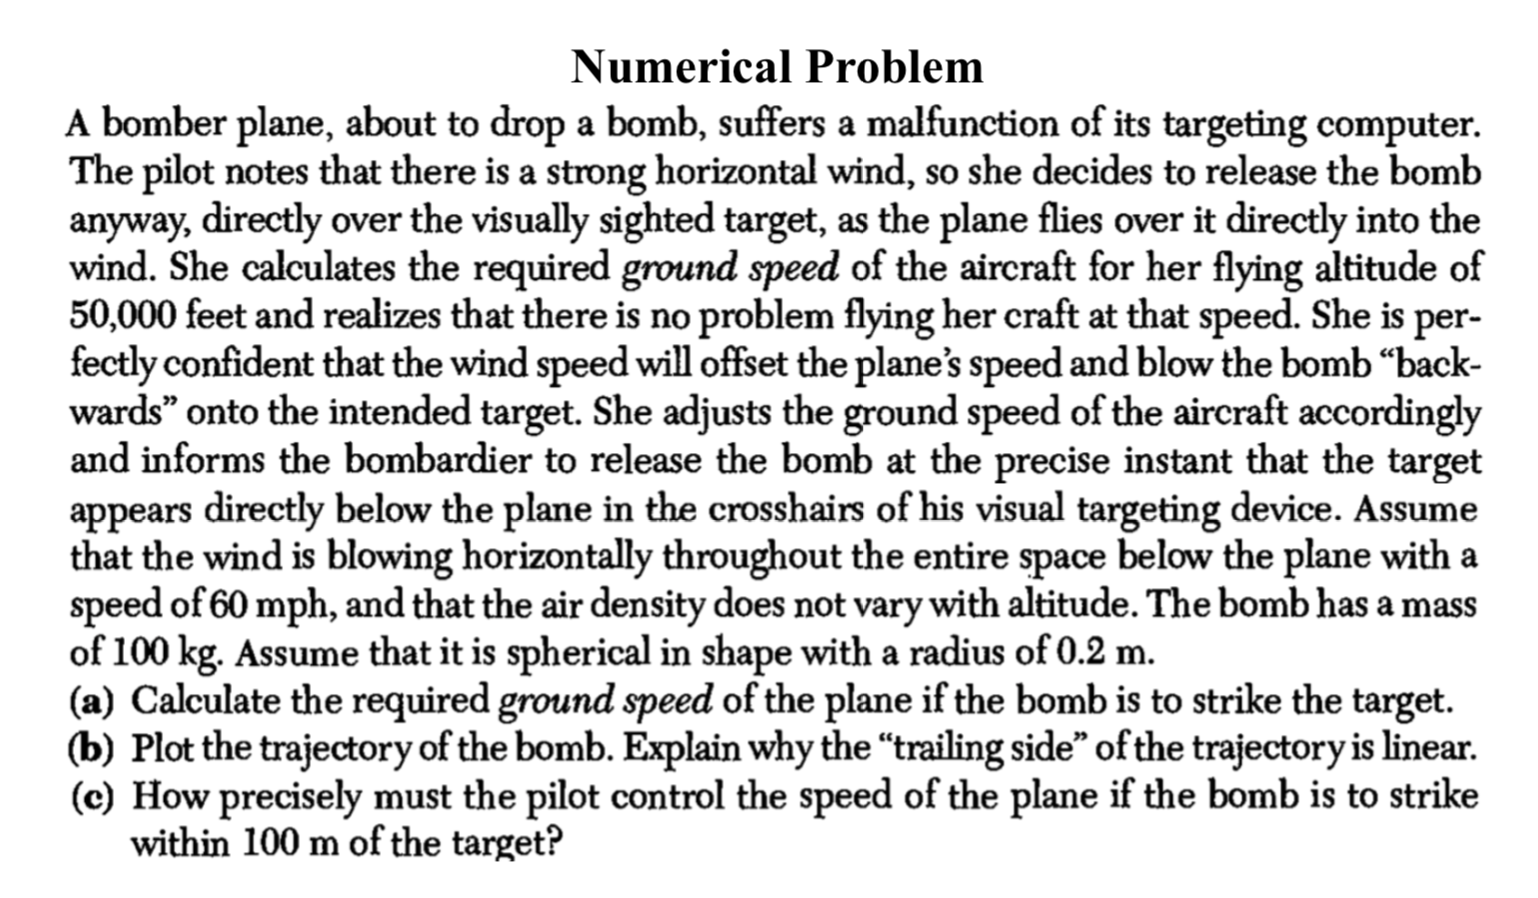

In [1]:
from IPython.display import Image
Image('./NA_images/NA3.png', width=800, height=700)

# The tutorial notebook for the numerical problem 4

# How to sink a ship with a shot made by its own cannon?

A ship moves with the velocity $v_\mathrm{sh} = 60$ km/h, and the wind blows with 
the speed $v_\mathrm{w} = 30$ km/h in the opposite direction. A cannon on the ship is used to shoot
a ball with a muzzle velocity $v_\mathrm{cb} = 300$ m/s at an elevation angle (altitude) $\alpha$ 
in the direction of ship's motion. 

The radius and mass of the ball are $r=5$ cm and $m=3$ kg.

__Questions:__ 

__(a)__ At which altitude $\alpha$ should the cannon ball be shot for it to hit the ship when coming back to the ground? Neglect the length and height of the ship. Assume that the ball will experience the drag force
$\mathbf{F}_\mathrm{d} = -\frac{1}{2}C_\mathrm{d}\rho_\mathrm{a} A\mathbf{v}_\mathrm{ba}|\mathbf{v}_\mathrm{ba}|$,
where $C_\mathrm{d} = 0.47$ is the dimensionless drag coefficient, $\rho_\mathrm{a} = 1\ \mathrm{kg/m}^3$ is
the air density, $A$ is the cross-section area of the ball, and $\mathbf{v}_\mathrm{ba}$ is the velocity of
the ball relative to the air.

__(b)__ How does the answer change if there is no wind?

### The equation of motion (Newton's second law) in this case is

$\frac{d\mathbf{p}}{dt} = m\frac{d\mathbf{v}}{dt} = \mathbf{F} = \mathbf{F}_\mathrm{g} + \mathbf{F}_\mathrm{d} = m\mathbf{g} - \frac{1}{2}C_\mathrm{d}\rho_\mathrm{a}A\mathbf{v}_\mathrm{ba}\,
|\mathbf{v}_\mathrm{ba}|$, where

$\mathbf{v}_\mathrm{ba} = \mathbf{v}-\mathbf{v}_\mathrm{w}$ is the velocity of the ball relative to the air.

Let's choose the coordinate x axis aligned with the direction of ship's motion and the y axis 
directed vertically up and assume that the ship is at the point with $x=0$ and $y=0$ when the cannon shoots 
at $t=0$. In this case, the wind velocity $\mathbf{v}_\mathrm{w} = -v_\mathrm{w}\mathbf{e}_x$,
and the projections of the equation of motion on the Cartesian coordinate axes are 

$$
m\ddot{x} = - c_2(\dot{x}+v_\mathrm{w})\,\sqrt{(\dot{x}+v_\mathrm{w})^2+\dot{y}^2},\\
m\ddot{y} = -mg - c_2\dot{y}\,\sqrt{(\dot{x}+v_\mathrm{w})^2+\dot{y}^2},\\
$$

where $c_2 = \frac{1}{2}C_\mathrm{d}\rho_\mathrm{a}A$.

The above two second-order ODEs can be written as a system of four first-order ODEs as

$$
\dot{y_1} = y_2,\\ \ \
\dot{y_2} = b(y_2+v_\mathrm{w})\sqrt{(y_2+v_\mathrm{w})^2+y_4^2},\\
\dot{y_3} = y_4,\\ \ \
\dot{y_4} = a + by_4\sqrt{(y_2+v_\mathrm{w})^2+y_4^2},\\
$$

where $y_1 = x$, $y_2 = \dot{x}$, $y_3 = y$, $y_4 = \dot{y}$,  $a = -g$, and $b=-\frac{c_2}{m}$.

The initial conditions for the cannon-ball trajectory are $y_1(0) = 0$, $y_2(0) = v_\mathrm{sh} + v_\mathrm{cb}\cos\alpha$, 
$y_3(0) = 0$, and $y_4(0) = v_\mathrm{cb}\sin\alpha$.

# If you need help 
Examples and Python notebooks at https://github.com/UVic-CompPhys/physmath248-2018
will help you to find solutions of this and other problems and to present your solutions in a form of a python notebook. 
In particuar, some help for the solution of the present problem
can be found in the following notebooks: 

`Introduction.ipynb`

`Part.I 3. Introduction to Python programming.ipynb`

`Part.III 1. ODEs.ipynb`

In [2]:
# populate the interactive namespace with functions 
# from the modules numpy and matplotlib
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [3]:
# the following commands allow to produce a nice pdf version of 
# the notebook with figures:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [4]:
# the function defining the right-hand sides of the ODEs
def dy_dt(y, t, a, b, vw):
    y1, y2, y3, y4 = y
    dydt = [y2, b*(y2+vw)*sqrt((y2+vw)**2+y4**2), y4, a+b*y4*sqrt((y2+vw)**2+y4**2)]
    return dydt

## The parameters of the problem

In [42]:
Cd = 0.47  # the dimensionless air-drag coefficient
r = 0.05  # ball's radius in m
m = 3.0  # ball's mas in kg
A = pi*r**2  # ball's cross-section area in m**2

g = 9.8  # the gravitational accelation on the surface of Earth (in m/s**2)
rhoa = 1.  # the air density (in kg/m**3)

c2 = 0.5*Cd*rhoa*A

# the coefficients in the ODEs
a = -g
b = -c2/m

vcb = 300.  # cannon-ball's initial velocity in m/s

fac = (1000./3600.)  # a coefficient to transform km/h to m/s
vsh = 60.*fac  # ship's velocity in m/s
vw = 30.*fac  # wind's speed in m/s

# with wind
altitude = 82 # Make an initial guess. Will have to come back and edit this
alpha = (pi/180.)*altitude  # altitude in radians

# without wind
#altitude = 84.805991 # 84  # in degrees
#alpha = (pi/180.)*altitude  # altitude in radians

# the initial conditions
y0 = [0.0, vsh+vcb*cos(alpha), 0.0, vcb*sin(alpha)]

In [43]:
# populate the interactive namespace with the function 
# that solves ODEs
from scipy.integrate import odeint

## A solution 

In [44]:
# the integration time interval
t_start = 0.
t_end = 36. # adjust t_end, using the plot below, 
# such that cannon-ball's final height is negative
nt = 10000 # the number of integration time steps

t = linspace(t_start, t_end, nt)

In [45]:
# solve the ODEs
# the coefficients a and b are defined above
sol = odeint(dy_dt, y0, t, args=(a, b, vw))

In [46]:
# select a part of the solution with the heights
# between y=sol[1,2] > 0. and y=0

h = sol[1,2] # the height
k = 0
while h > 0.:
    k += 1
    h = sol[k,2]
    
k = k+2

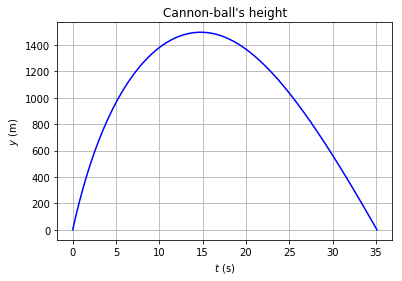

In [47]:
# plot cannon-ball's height as a function of time
figure(1)

plot(t[0:k], sol[0:k, 2], 'b')
xlabel('$t\ (\mathrm{s})$')
ylabel('$y\ (\mathrm{m})$')
grid()
title("Cannon-ball's height")
show()

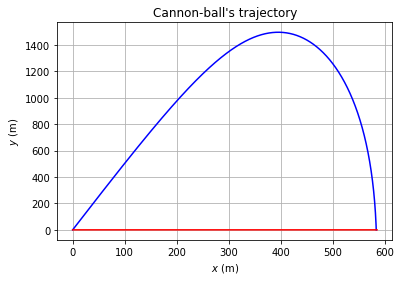

In [48]:
# plot cannon-ball's trajectory
figure(2)

plot(sol[0:k, 0], sol[0:k,2], 'b')
ysh = linspace(0,0,len(t[0:k]))
plot(vsh*t[0:k],ysh,'r')
xlabel('$x\ (\mathrm{m})$')
ylabel('$y\ (\mathrm{m})$')
grid()
title("Cannon-ball's trajectory")
show()

In [49]:
# populate the interactive namespace with the function 
# that makes 1d interpolation
from scipy.interpolate import interp1d

In [50]:
# interpolate the solution of the ODEs to find 
# the horizontal distances travelled by the ship
# and the cannon ball before the latter hits the ground

# interpolate from the second integration step to skip 
# the starting point, where sol[0,2] is also equal to 0.
fx = interp1d(sol[1:-1,2],sol[1:-1,0])
ft = interp1d(sol[1:-1,2],t[1:-1])
xsh = ft(0.)*vsh
print ("The path travelled by the ship before the cannon ball hits the ground is %8.4f" % xsh,"m")
print ("When the cannon ball hits the ground it will be at the distance %8.4f" % fx(0.),"m")

The path travelled by the ship before the cannon ball hits the ground is 585.3966 m
When the cannon ball hits the ground it will be at the distance 583.9692 m


In [51]:
# use this for loop to find the altitude
# with a higher accuracy

alt = linspace(81,83,100)  # with wind
#alt = linspace(84.80598,84.806,100)  # without wind

for ia in range (len(alt)):

    alpha = (pi/180.)*alt[ia]

    # the initial conditions
    y0 = [0.0, vsh+vcb*cos(alpha), 0.0, vcb*sin(alpha)]

    # solve the ODEs
    sol = odeint(dy_dt, y0, t, args=(a, b, vw))

    # select a part of the solution with the heights 
    # between y=sol[1,2] > 0. and y=0

    h = sol[1,2]
    k = 0
    while h > 0.:
        k += 1
        h = sol[k,2]
    
    k = k+10

    fx = interp1d(sol[1:-1,2],sol[1:-1,0])
    ft = interp1d(sol[1:-1,2],t[1:-1])
    xsh = ft(0.)*vsh
    
    print(alt[ia],fx(0.)-xsh)

81.0 63.29678280143605
81.02020202020202 61.998540171201626
81.04040404040404 60.6999100686952
81.06060606060606 59.40089301979128
81.08080808080808 58.10148793483302
81.1010101010101 56.80169562214735
81.12121212121212 55.5015165276709
81.14141414141415 54.20094979434941
81.16161616161617 52.89999736813263
81.18181818181819 51.59865828092802
81.20202020202021 50.296932837855934
81.22222222222223 48.99482241683154
81.24242424242425 47.692325409436535
81.26262626262626 46.389443388589484
81.28282828282828 45.086176924613255
81.3030303030303 43.782524257366504
81.32323232323232 42.47848780787467
81.34343434343434 41.174066893380314
81.36363636363636 39.86926123905141
81.38383838383838 38.5640725224539
81.4040404040404 37.25849927950014
81.42424242424242 35.95254280803158
81.44444444444444 34.6462038269392
81.46464646464646 33.339480570773276
81.48484848484848 32.03237548277002
81.5050505050505 30.724887732689808
81.52525252525253 29.417017328128054
81.54545454545455 28.10876582904632
81.

So, the answer is $\alpha\approx 81.978101$ degrees (with wind).

So, the answer is $\alpha\approx 84.805991$ degrees (without wind).